## Reading and Understanding the Data

In [94]:
# Importing the necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import linear_model, metrics
from statsmodels.stats.outliers_influence import variance_inflation_factor
import statsmodels.api as sm
from sklearn.feature_selection import RFE
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression,Ridge,Lasso
from sklearn.model_selection import train_test_split,GridSearchCV,KFold,cross_val_score
from sklearn.metrics import mean_squared_error, r2_score
from scipy.stats import norm
# Hide warnings
import warnings
warnings.filterwarnings('ignore')
# Display settings:
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
pd.set_option('display.max_info_columns', 200)
pd.set_option('display.max_colwidth', -1)
pd.set_option('float_format','{:f}'.format)
sns.set_style('dark')

In [95]:
Housedata = pd.read_csv(r'C:\Users\annma\Downloads\train.csv')
Housedata.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.000000,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.000000,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.000000,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.000000,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.000000,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.000000,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.000000,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.000000,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.000000,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.000000,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.000000,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.000000,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.000000,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.000000,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.000000,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [96]:
Housedata.shape

(1460, 81)

In [97]:
# Check the info to see the types of the feature variables and the null values present
Housedata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

#### Defining a function to find count, null, unique, datatype of each column in the dataframe

In [98]:
def Housedata_info(df):
    count = df.count()
    null = df.isnull().sum()
    null_perc = round(df.isnull().sum()/len(df.index)*100,4)
    unique = df.nunique()
    types = df.dtypes
    return pd.concat([count, null, null_perc, unique, types], 
                     axis = 1,keys=['COUNT','NULL','PERCENT','UNIQUE','DATATYPE']).sort_values(by='PERCENT',ascending=False)

In [99]:
Housedata_info(Housedata).style.background_gradient(cmap='Blues',subset=['NULL','PERCENT'])

,COUNT,NULL,PERCENT,UNIQUE,DATATYPE
PoolQC,7,1453,99.520500,3,object
MiscFeature,54,1406,96.301400,4,object
Alley,91,1369,93.767100,2,object
Fence,281,1179,80.753400,4,object
FireplaceQu,770,690,47.260300,5,object
LotFrontage,1201,259,17.739700,110,float64
GarageYrBlt,1379,81,5.547900,97,float64
GarageCond,1379,81,5.547900,5,object
GarageType,1379,81,5.547900,6,object
GarageFinish,1379,81,5.547900,3,object


There are total 19 columns in which NA values are present. Let’s check columns with NA values and decide how to handle them.

## Data Cleaning


ID column doesnot look important for our analysis. Hence will drop it.

In [100]:
Housedata.drop('Id', axis=1, inplace=True)

Before dropping columns with > 40% null values we need to first exclude the values which are NA. As per the data dictionary as in some columns NA means that those features not present.Hence will replace NaN's instead of dropping them.

In [101]:
Housedata['Alley'].fillna('No alley access', inplace=True)
Housedata['BsmtQual'].fillna('No Basement', inplace=True)
Housedata['BsmtCond'].fillna('No Basement', inplace=True)
Housedata['BsmtExposure'].fillna('No Basement', inplace=True)
Housedata['BsmtFinType1'].fillna('No Basement', inplace=True)
Housedata['BsmtFinType2'].fillna('No Basement', inplace=True)
Housedata['FireplaceQu'].fillna('No Fireplace', inplace=True)
Housedata['GarageType'].fillna('No Garage', inplace=True)
Housedata['GarageFinish'].fillna('No Garage', inplace=True)
Housedata['GarageQual'].fillna('No Garage', inplace=True)
Housedata['GarageCond'].fillna('No Garage', inplace=True)
Housedata['PoolQC'].fillna('No Pool', inplace=True)
Housedata['Fence'].fillna('No Fence', inplace=True)
Housedata['MiscFeature'].fillna('None', inplace=True)

In [102]:
# checking again the column with Null values % greater than 0:
round(100*(Housedata.isnull().sum()/len(Housedata.index)),
      2)[round(100*(Housedata.isnull().sum()/len(Housedata.index)), 2).values>0.00]

LotFrontage   17.740000
MasVnrType    0.550000 
MasVnrArea    0.550000 
Electrical    0.070000 
GarageYrBlt   5.550000 
dtype: float64

Instead of dropping we will treat them with imputing method

count   1201.000000
mean    70.049958  
std     24.284752  
min     21.000000  
25%     59.000000  
50%     69.000000  
75%     80.000000  
max     313.000000 
Name: LotFrontage, dtype: float64


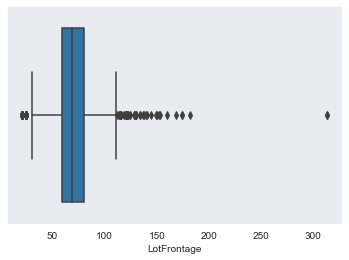

In [103]:
# LotFrontage:
print(Housedata.LotFrontage.describe())
sns.boxplot(Housedata['LotFrontage']);

In [104]:
#Since there is not much difference between the mean and the median, we will impute it with mean.
Housedata.loc[Housedata["LotFrontage"].isnull(),"LotFrontage"]=70.049958
# cross-checking again the sum of null values:
print("Null values in LotFrontage:",Housedata.LotFrontage.isnull().sum())

Null values in LotFrontage: 0


count   1379.000000
mean    1978.506164
std     24.689725  
min     1900.000000
25%     1961.000000
50%     1980.000000
75%     2002.000000
max     2010.000000
Name: GarageYrBlt, dtype: float64


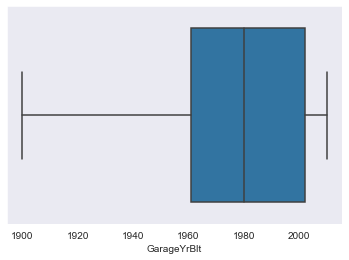

In [105]:
# GarageYrBlt:
print(Housedata.GarageYrBlt.describe())
sns.boxplot(Housedata['GarageYrBlt']);

In [106]:
# Imputing GarageYrblt with median:
Housedata.loc[Housedata["GarageYrBlt"].isnull(),"GarageYrBlt"]=Housedata.GarageYrBlt.median()
# cross-checking again the sum of null values:
print("Null values in GarageYrBlt:",Housedata.GarageYrBlt.isnull().sum())

Null values in GarageYrBlt: 0


Null values in MasVnrType: 0
Null values in MasVnrArea: 0


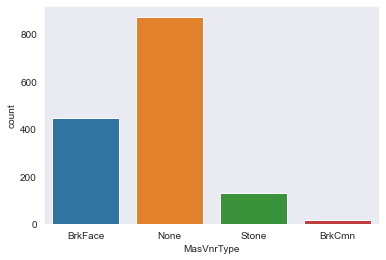

In [107]:
# Imputing MasVnrType with None as per data dictionary and MasVnrArea with median:
Housedata['MasVnrType'].fillna('None', inplace=True)
Housedata['MasVnrArea'].fillna(0, inplace=True)
print("Null values in MasVnrType:",Housedata.MasVnrType.isnull().sum())
print("Null values in MasVnrArea:",Housedata.MasVnrArea.isnull().sum())
sns.countplot(Housedata["MasVnrType"]);

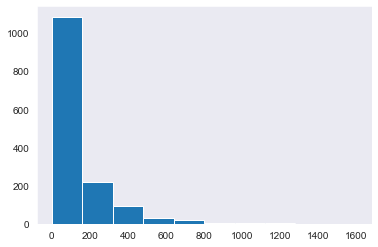

In [108]:
plt.hist(Housedata["MasVnrArea"]);

Null values in Electrical: 0


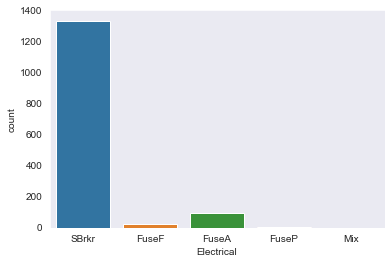

In [109]:
# Imputing Electrical column missing value with mode :
Housedata['Electrical'].fillna('SBrkr', inplace=True)
print("Null values in Electrical:",Housedata.Electrical.isnull().sum())
sns.countplot(Housedata["Electrical"]);

## Handling Data Imbalance:

Analysing, grouping and deleting the values having high skeweness.

In [110]:
# Checking for skewed categorical columns
skew_obj_cols = []
obj_cols = Housedata.select_dtypes(exclude=['int64', 'float64'])
for col in obj_cols:
    if(Housedata[col].value_counts(normalize=True).max() >= 0.90):
        print(f'- {col} : {round(Housedata[col].value_counts(normalize=True).max()*100,2)}%')
        skew_obj_cols.append(col)

- Street : 99.59%
- Alley : 93.77%
- Utilities : 99.93%
- LandSlope : 94.66%
- Condition2 : 98.97%
- RoofMatl : 98.22%
- Heating : 97.81%
- CentralAir : 93.49%
- Electrical : 91.44%
- Functional : 93.15%
- GarageCond : 90.82%
- PavedDrive : 91.78%
- PoolQC : 99.52%
- MiscFeature : 96.3%


In [111]:
for item in skew_obj_cols:                      
    print("Value_counts in feature : %s" %(item))
    print(Housedata[item].value_counts(normalize=True)*100)
    print('----------------------------------------------')

Value_counts in feature : Street
Pave   99.589041
Grvl   0.410959 
Name: Street, dtype: float64
----------------------------------------------
Value_counts in feature : Alley
No alley access   93.767123
Grvl              3.424658 
Pave              2.808219 
Name: Alley, dtype: float64
----------------------------------------------
Value_counts in feature : Utilities
AllPub   99.931507
NoSeWa   0.068493 
Name: Utilities, dtype: float64
----------------------------------------------
Value_counts in feature : LandSlope
Gtl   94.657534
Mod   4.452055 
Sev   0.890411 
Name: LandSlope, dtype: float64
----------------------------------------------
Value_counts in feature : Condition2
Norm     98.972603
Feedr    0.410959 
PosN     0.136986 
Artery   0.136986 
RRNn     0.136986 
PosA     0.068493 
RRAe     0.068493 
RRAn     0.068493 
Name: Condition2, dtype: float64
----------------------------------------------
Value_counts in feature : RoofMatl
CompShg   98.219178
Tar&Grv   0.753425 
WdShng

In [112]:
# Dropping the highly skewed categorical columns
Housedata.drop(skew_obj_cols, axis=1, inplace=True)
Housedata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 66 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSSubClass     1460 non-null   int64  
 1   MSZoning       1460 non-null   object 
 2   LotFrontage    1460 non-null   float64
 3   LotArea        1460 non-null   int64  
 4   LotShape       1460 non-null   object 
 5   LandContour    1460 non-null   object 
 6   LotConfig      1460 non-null   object 
 7   Neighborhood   1460 non-null   object 
 8   Condition1     1460 non-null   object 
 9   BldgType       1460 non-null   object 
 10  HouseStyle     1460 non-null   object 
 11  OverallQual    1460 non-null   int64  
 12  OverallCond    1460 non-null   int64  
 13  YearBuilt      1460 non-null   int64  
 14  YearRemodAdd   1460 non-null   int64  
 15  RoofStyle      1460 non-null   object 
 16  Exterior1st    1460 non-null   object 
 17  Exterior2nd    1460 non-null   object 
 18  MasVnrTy

In [113]:
# checking the categories of other col where we can group the categories together:
other_col = ['LandContour','Condition1','BsmtCond','BsmtFinType2','GarageQual','SaleType']
for i in other_col:                      
    print("Value_counts in feature : %s" %(i))
    print(Housedata[i].value_counts(normalize=True)*100)
    print('----------------------------------------------')

Value_counts in feature : LandContour
Lvl   89.794521
Bnk   4.315068 
HLS   3.424658 
Low   2.465753 
Name: LandContour, dtype: float64
----------------------------------------------
Value_counts in feature : Condition1
Norm     86.301370
Feedr    5.547945 
Artery   3.287671 
RRAn     1.780822 
PosN     1.301370 
RRAe     0.753425 
PosA     0.547945 
RRNn     0.342466 
RRNe     0.136986 
Name: Condition1, dtype: float64
----------------------------------------------
Value_counts in feature : BsmtCond
TA            89.794521
Gd            4.452055 
Fa            3.082192 
No Basement   2.534247 
Po            0.136986 
Name: BsmtCond, dtype: float64
----------------------------------------------
Value_counts in feature : BsmtFinType2
Unf           86.027397
Rec           3.698630 
LwQ           3.150685 
No Basement   2.602740 
BLQ           2.260274 
ALQ           1.301370 
GLQ           0.958904 
Name: BsmtFinType2, dtype: float64
----------------------------------------------
Value_c

In [114]:
# Grouping the less values in columns to a group as others:
Housedata['SaleType'].replace(['ConLD','ConLI','ConLw','CWD','Oth','Con'], 'others', inplace=True)
Housedata['GarageQual'].replace(['Fa','Gd','Po','Ex'], 'others', inplace=True)
Housedata['LandContour'].replace(['Bnk','HLS','Low'], 'others', inplace=True)
Housedata['Condition1'].replace(['Artery','RRAn','PosN','RRAe','PosA','RRNn','RRNe'], 'others', inplace=True)
Housedata['BsmtCond'].replace(['Fa','No Basement','Po'], 'others', inplace=True)
Housedata['BsmtFinType2'].replace(['LwQ','No Basement','BLQ','ALQ','GLQ'], 'others', inplace=True)
# Grouping some more cateogorical columns which have large no of catgories in it:
Housedata['SaleCondition'].replace(['Family','Alloca','AdjLand'], 'others', inplace=True)
Housedata['HouseStyle'].replace(['SLvl','SFoyer','1.5Unf','2.5Unf','2.5Fin'], 'others', inplace=True)
Housedata['MasVnrType'].replace(['Stone','BrkCmn'], 'others', inplace=True)
Housedata['LotConfig'].replace(['CulDSac','FR2','FR3'], 'others', inplace=True)
Housedata['BldgType'].replace(['Duplex','Twnhs','2fmCon'], 'others', inplace=True)

In [115]:
# Checking for skewed numerical data:
num_cols = Housedata.select_dtypes(include=['int64', 'float'])
skew_num_cols = []
for col in num_cols:
    if(Housedata[col].value_counts(normalize=True).max() >= 0.90):
        skew_num_cols.append(col)
        print(f'- {col} : {round(Housedata[col].value_counts(normalize=True).max()*100, 2)}%')

- LowQualFinSF : 98.22%
- BsmtHalfBath : 94.38%
- KitchenAbvGr : 95.34%
- 3SsnPorch : 98.36%
- ScreenPorch : 92.05%
- PoolArea : 99.52%
- MiscVal : 96.44%


In [116]:
# Dropping highly skewed columns:
Housedata.drop(skew_num_cols, axis=1, inplace=True)
Housedata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 59 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSSubClass     1460 non-null   int64  
 1   MSZoning       1460 non-null   object 
 2   LotFrontage    1460 non-null   float64
 3   LotArea        1460 non-null   int64  
 4   LotShape       1460 non-null   object 
 5   LandContour    1460 non-null   object 
 6   LotConfig      1460 non-null   object 
 7   Neighborhood   1460 non-null   object 
 8   Condition1     1460 non-null   object 
 9   BldgType       1460 non-null   object 
 10  HouseStyle     1460 non-null   object 
 11  OverallQual    1460 non-null   int64  
 12  OverallCond    1460 non-null   int64  
 13  YearBuilt      1460 non-null   int64  
 14  YearRemodAdd   1460 non-null   int64  
 15  RoofStyle      1460 non-null   object 
 16  Exterior1st    1460 non-null   object 
 17  Exterior2nd    1460 non-null   object 
 18  MasVnrTy

## Deriving new Metrices from the existing Metrices:

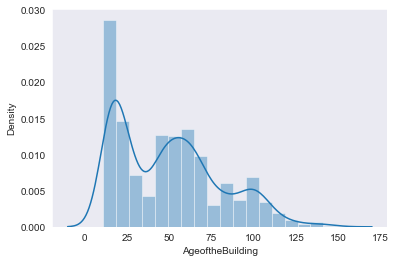

In [117]:
#Deriving the feature AgeoftheBuilding from YearBuilt:
Housedata["AgeoftheBuilding"]=Housedata["YearBuilt"].apply(lambda x: 2021 - x)
# Distplot:
sns.distplot(Housedata['AgeoftheBuilding']);

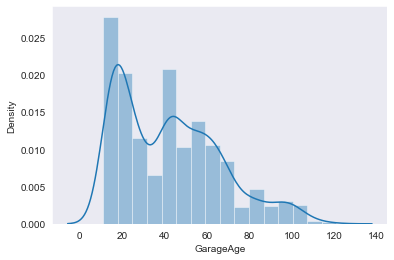

In [118]:
# Deriving a column GarageAge from GarageYrBlt:
Housedata["GarageAge"]=Housedata["GarageYrBlt"].apply(lambda x: 2021 - x)
sns.distplot(Housedata['GarageAge']);

In [119]:
# Deriving a column years_since_last_remodelling and AgeOnSale from YrSold:
Housedata['years_since_last_remodelling'] = 2021 - Housedata['YearRemodAdd']
Housedata['AgeOnSale'] = 2021 - Housedata['YrSold']

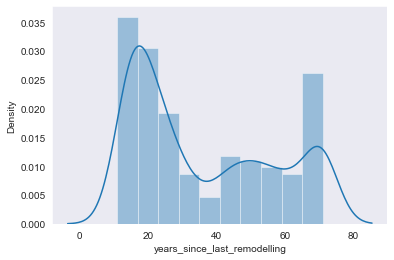

In [120]:
sns.distplot(Housedata['years_since_last_remodelling']);

In [121]:
# Dropping the columns from which we have derived the information
Housedata.drop(['YearBuilt', 'YearRemodAdd', 'YrSold', 'MoSold', 'GarageYrBlt'], axis=1, inplace=True)

## Outlier Treatment:

In [122]:
# Identifying actual numerical variables

house_attr = Housedata_info(Housedata)
num_vars = list(house_attr.loc[(house_attr.DATATYPE != 'object')].index)
# removing Target variable and categorical column which have datatype as int instead of object:
num_vars.remove('SalePrice') 
num_vars.remove('OverallCond')
num_vars.remove('OverallQual')
num_vars.remove('MSSubClass')

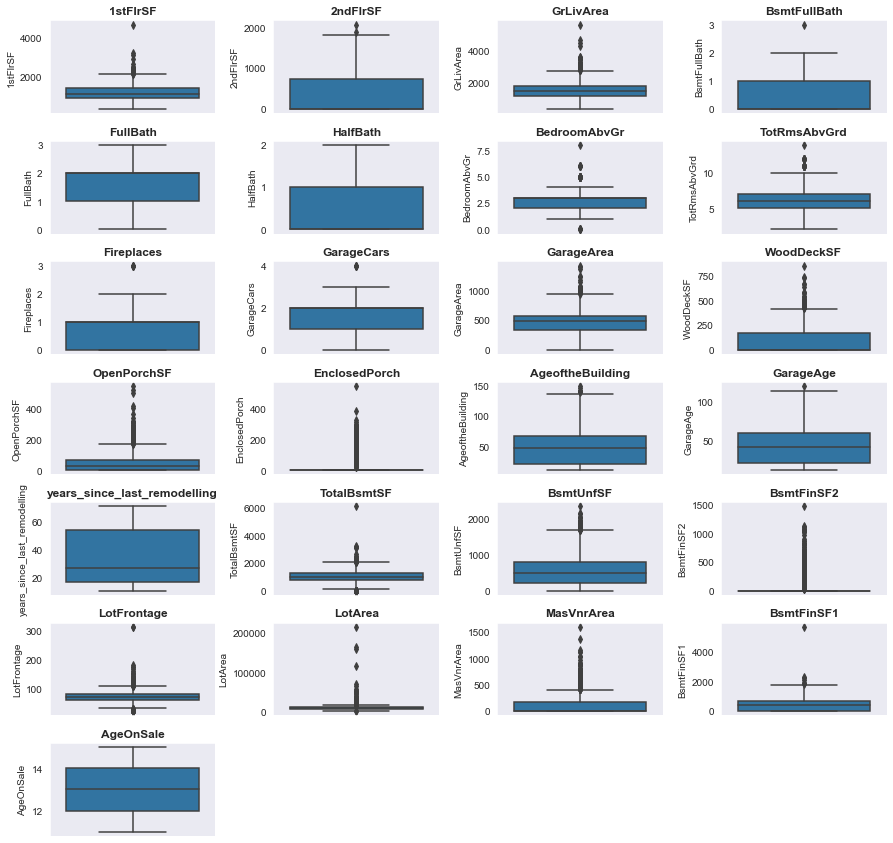

In [123]:
# plotting the numerical variables:
plt.figure(figsize = (15,15))

for i, col in enumerate(num_vars):
    plt.subplot(7,4 , i+1)
    sns.boxplot(y=col, data=Housedata)
    plt.title(col, weight='bold')
plt.subplots_adjust(wspace=0.35, hspace = 0.3)

In [124]:
# Checking the percentiles of the numerical columns:
Housedata[num_vars].describe(percentiles=[0.25, 0.5, 0.75, 0.90, 0.95, 0.99])

,1stFlrSF,2ndFlrSF,GrLivArea,BsmtFullBath,FullBath,HalfBath,BedroomAbvGr,TotRmsAbvGrd,Fireplaces,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,AgeoftheBuilding,GarageAge,years_since_last_remodelling,TotalBsmtSF,BsmtUnfSF,BsmtFinSF2,LotFrontage,LotArea,MasVnrArea,BsmtFinSF1,AgeOnSale
count,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,1162.626712,346.992466,1515.463699,0.425342,1.565068,0.382877,2.866438,6.517808,0.613014,1.767123,472.980137,94.244521,46.660274,21.954110,49.732192,42.410959,36.134247,1057.429452,567.240411,46.549315,70.049958,10516.828082,103.117123,443.639726,13.184247
std,386.587738,436.528436,525.480383,0.518911,0.550916,0.502885,0.815778,1.625393,0.644666,0.747315,213.804841,125.338794,66.256028,61.119149,30.202904,23.997022,20.645407,438.705324,441.866955,161.319273,22.024023,9981.264932,180.731373,456.098091,1.328095
min,334.000000,0.000000,334.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,11.000000,11.000000,11.000000,0.000000,0.000000,0.000000,21.000000,1300.000000,0.000000,0.000000,11.000000
25%,882.000000,0.000000,1129.500000,0.000000,1.000000,0.000000,2.000000,5.000000,0.000000,1.000000,334.500000,0.000000,0.000000,0.000000,21.000000,20.000000,17.000000,795.750000,223.000000,0.000000,60.000000,7553.500000,0.000000,0.000000,12.000000
50%,1087.000000,0.000000,1464.000000,0.000000,2.000000,0.000000,3.000000,6.000000,1.000000,2.000000,480.000000,0.000000,25.000000,0.000000,48.000000,41.000000,27.000000,991.500000,477.500000,0.000000,70.049958,9478.500000,0.000000,383.500000,13.000000
75%,1391.250000,728.000000,1776.750000,1.000000,2.000000,1.000000,3.000000,7.000000,1.000000,2.000000,576.000000,168.000000,68.000000,0.000000,67.000000,59.000000,54.000000,1298.250000,808.000000,0.000000,79.000000,11601.500000,164.250000,712.250000,14.000000
90%,1680.000000,954.200000,2158.300000,1.000000,2.000000,1.000000,4.000000,9.000000,1.000000,3.000000,757.100000,262.000000,130.000000,112.000000,96.100000,73.000000,71.000000,1602.200000,1232.000000,117.200000,92.000000,14381.700000,335.000000,1065.500000,15.000000
95%,1831.250000,1141.050000,2466.100000,1.000000,2.000000,1.000000,4.000000,10.000000,2.000000,3.000000,850.100000,335.000000,175.050000,180.150000,105.000000,91.000000,71.000000,1753.000000,1468.000000,396.200000,104.000000,17401.150000,456.000000,1274.000000,15.000000
99%,2219.460000,1418.920000,3123.480000,2.000000,3.000000,1.000000,5.000000,11.000000,2.000000,3.000000,1002.790000,505.460000,285.820000,261.050000,121.820000,103.820000,71.000000,2155.050000,1797.050000,830.380000,137.410000,37567.640000,791.280000,1572.410000,15.000000


In [125]:
# capping the feature at 99% percentiles:
outlier_cols = ['GrLivArea', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF', '1stFlrSF','OpenPorchSF',
                'EnclosedPorch','TotalBsmtSF','BsmtFinSF2', 'LotFrontage','LotArea', 'MasVnrArea',
                'BsmtUnfSF','BsmtFinSF1']

# Removing the outliers above 99th percentile
for col in outlier_cols:
    Housedata = Housedata[Housedata[col] < Housedata[col].quantile(0.99)]

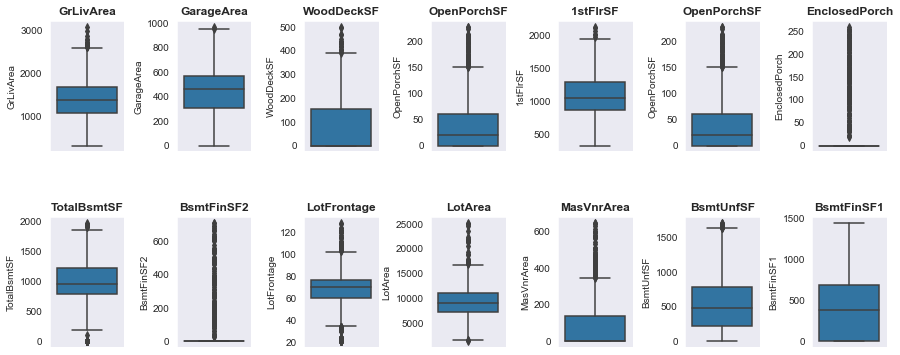

In [126]:
plt.figure(figsize = (15,6))

for i, col in enumerate(outlier_cols):
    plt.subplot(2,7, i+1)
    sns.boxplot(y=col, data=Housedata)
    plt.title(col, weight='bold')
    
plt.subplots_adjust(wspace=0.70, hspace = 0.5)

#### Visualizing target variable "SalesPrice"

Skew: 1.07
Kurtosis: 1.55


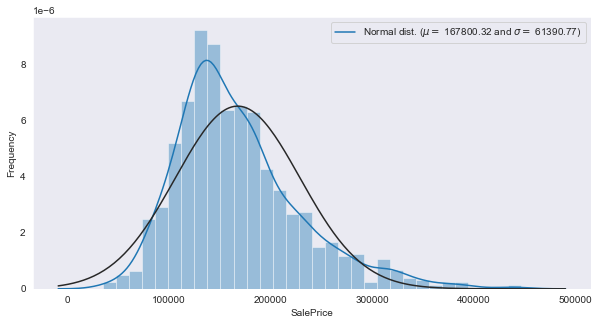

In [127]:
from scipy import stats

print(f'Skew: {round(Housedata.SalePrice.skew(), 2)}')
print(f'Kurtosis: {round(Housedata.SalePrice.kurtosis(), 2)}')

# Visualising the target variable 'SalePrice'
plt.figure(figsize=(10,5))
sns.distplot(Housedata['SalePrice'], fit=stats.norm)
mu, sigma = stats.norm.fit(Housedata['SalePrice'])
plt.legend([f'Normal dist. ($\mu=$ {round(mu,2)} and $\sigma=$ {round(sigma,2)})'], loc='best')
plt.ylabel('Frequency')
plt.show()

We can observe that our target variable is Right skewed. Applying log transformation to reduce the skewness.

Skew: -0.13
Kurtosis: 0.6


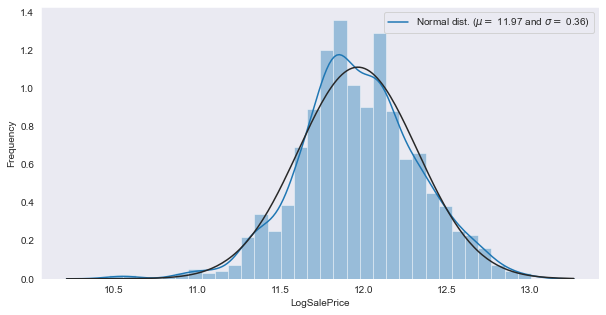

In [128]:
# creating a new variable LogSalePrice which is the log transformation of our target variable:
Housedata['LogSalePrice'] = np.log(Housedata['SalePrice'])
# Printing the skewness and kurtosis :
print(f'Skew: {round(Housedata.LogSalePrice.skew(), 2)}')
print(f'Kurtosis: {round(Housedata.LogSalePrice.kurtosis(), 2)}')
# Checking the normal distribution on the logSalePrice column: 
plt.figure(figsize=(10,5))
sns.distplot(Housedata['LogSalePrice'], fit=stats.norm);
mu, sigma = stats.norm.fit(Housedata['LogSalePrice'])
plt.legend([f'Normal dist. ($\mu=$ {round(mu,2)} and $\sigma=$ {round(sigma,2)})'], loc='best')
plt.ylabel('Frequency')
plt.show()

After applying log transformation, our target variable SalePrice is normally distributed and now our new variable "LogSalePrice" will act as target variable.

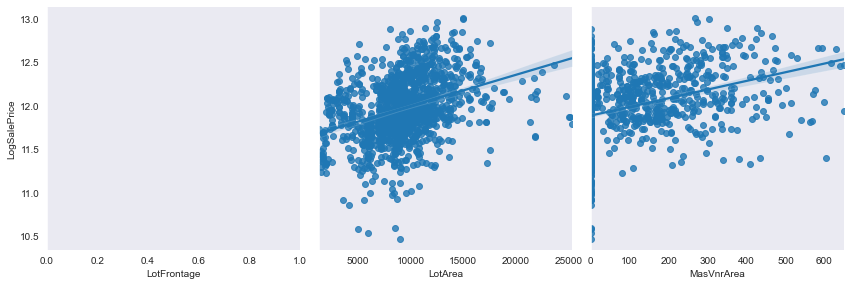

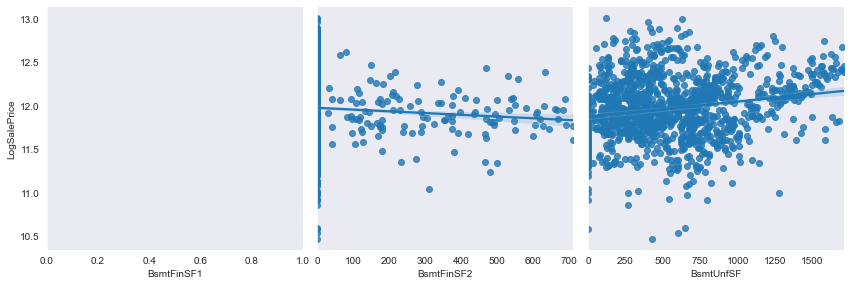

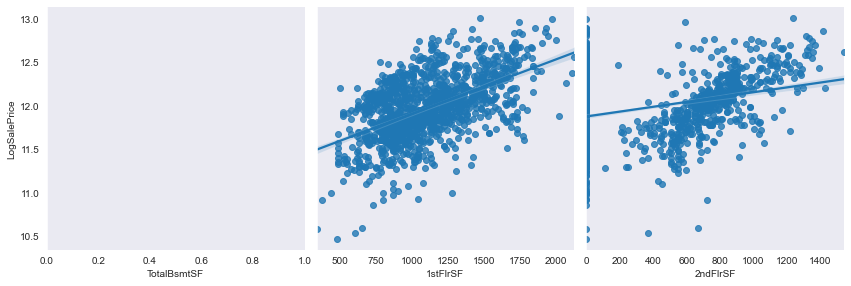

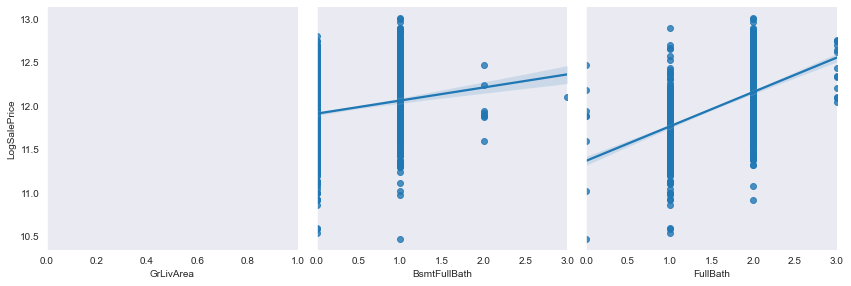

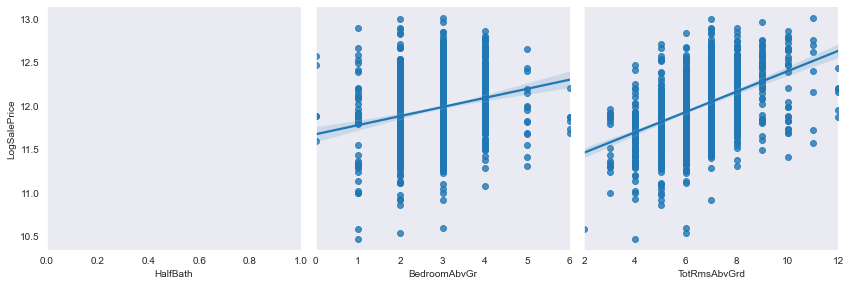

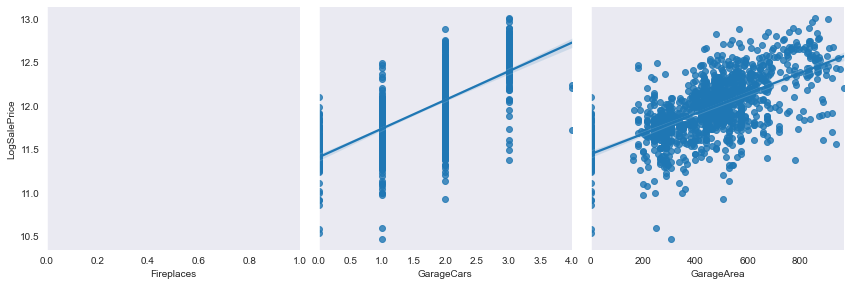

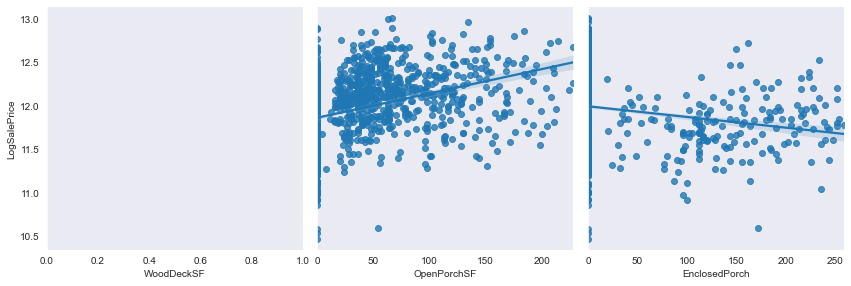

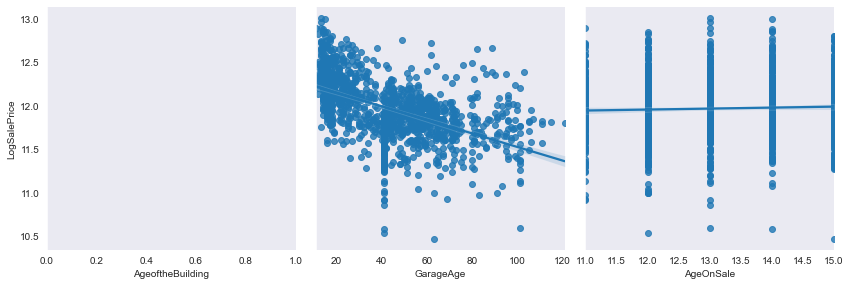

In [129]:
# We will do some plotting to analyse the relation between numerical variables and target variable:
num_cols = list(Housedata.select_dtypes(exclude='object').columns)
# excluding some columns which are target and categorical:
num_cols.remove('SalePrice') # target variable
num_cols.remove('LogSalePrice')  # transformed target variable
num_cols.remove('years_since_last_remodelling') 
num_cols.remove('OverallCond') # ordinal categorical variable
num_cols.remove('OverallQual') # ordinal categorical variable
num_cols.remove('MSSubClass')  # categorical variable 
num_cols_chunk = [num_cols[i:i+3] for i in range(0, len(num_cols), 3)]

for cols in num_cols_chunk:
    sns.pairplot(Housedata, x_vars=cols, y_vars='LogSalePrice', height=4, aspect=1, kind='reg');

From the above graphs,Most of the variables like OverallQual,TotalBsmtSF, GrLivArea, 1stFlrSF are directly proportional to SalePrice.
Some variables like AgeoftheBuilding, GarageAge are inversely proportional to SalePrice. OverallCond doesnot change much with the SalePrice.

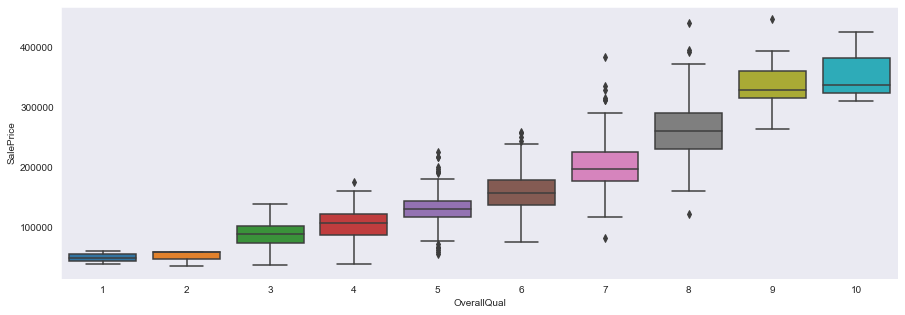

In [130]:
# Plotting 'OverallQual' vs 'SalePrice'
plt.figure(figsize=(15,5))
sns.boxplot(y='SalePrice', x='OverallQual', data=Housedata);

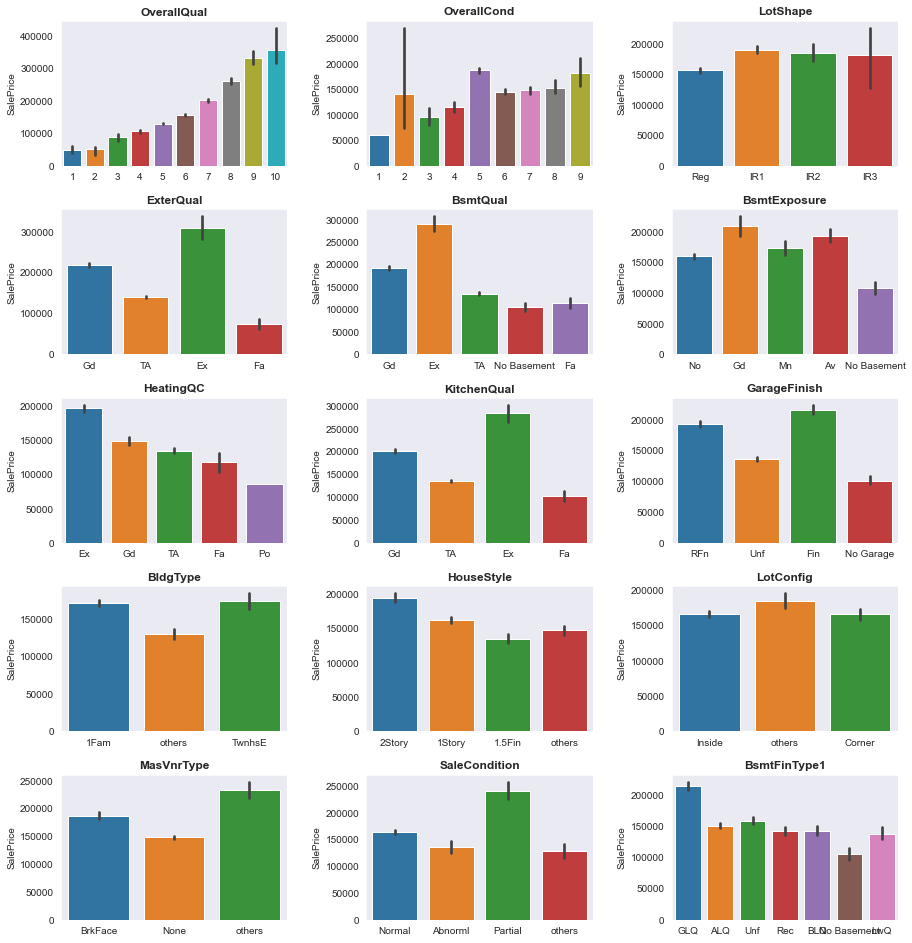

In [131]:
# Comparing the 'SalePrice' of various ordinal categorical columns:
ord_cols = ['OverallQual','OverallCond','LotShape', 'ExterQual', 'BsmtQual', 'BsmtExposure', 'HeatingQC', 'KitchenQual', 
             'GarageFinish', 'BldgType', 'HouseStyle', 'LotConfig', 'MasVnrType', 'SaleCondition','BsmtFinType1']

plt.figure(figsize=(15,20))
for i, col in enumerate(ord_cols):
    plt.subplot(6,3, i+1)
    sns.barplot(x=col, y='SalePrice', data=Housedata)
    plt.title(col, weight='bold')
    plt.xlabel(None)
plt.subplots_adjust(wspace=0.35, hspace = 0.3)

From the above plot, we can say that:
Excellent quality of external material, basement, kitchen and heating are more likely to fetch higher SalePrice.
Partial SaleCondition has higher average SalePrice than other types.
Garages with finished or rough finished interiors are more likely to fetch higher SalePrice.
Masony veneer finished with stone has higher average SalePrice.

In [132]:
Housedata=Housedata.drop(['SalePrice'],axis=1)

In [133]:
# Correlation matrix:
df=Housedata[num_cols]
df.corr()

,LotFrontage,LotArea,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,GrLivArea,BsmtFullBath,FullBath,HalfBath,BedroomAbvGr,TotRmsAbvGrd,Fireplaces,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,AgeoftheBuilding,GarageAge,AgeOnSale
LotFrontage,1.000000,0.583653,0.175944,0.126335,0.031402,0.121878,0.288121,0.360125,0.055069,0.309285,0.045032,0.147920,0.047260,0.288648,0.299277,0.204540,0.279781,0.314944,0.069979,0.148673,-0.004838,-0.113896,-0.050441,-0.003973
LotArea,0.583653,1.000000,0.091489,0.165902,0.022777,0.057793,0.255742,0.353171,0.097790,0.342761,0.072769,0.153793,0.099571,0.299452,0.329542,0.274952,0.242182,0.283540,0.117305,0.109805,-0.022801,-0.065458,-0.002181,0.016590
MasVnrArea,0.175944,0.091489,1.000000,0.193609,-0.045367,0.085164,0.295131,0.290153,0.129258,0.322491,0.070208,0.225345,0.178547,0.138720,0.251389,0.227699,0.323160,0.319098,0.118626,0.155130,-0.113592,-0.290303,-0.202746,0.002001
BsmtFinSF1,0.126335,0.165902,0.193609,1.000000,-0.037195,-0.565877,0.442180,0.355700,-0.188377,0.069681,0.644930,0.010027,-0.018370,-0.106684,-0.040977,0.194876,0.180098,0.227191,0.181931,0.065428,-0.124694,-0.232993,-0.135046,-0.027907
BsmtFinSF2,0.031402,0.022777,-0.045367,-0.037195,1.000000,-0.228238,0.025850,0.008348,-0.091026,-0.079152,0.119124,-0.102537,-0.051811,0.028903,-0.049110,-0.002182,-0.048876,-0.015190,0.068827,-0.064395,0.056304,0.074774,0.087252,-0.028781
BsmtUnfSF,0.121878,0.057793,0.085164,-0.565877,-0.228238,1.000000,0.443283,0.308691,-0.013391,0.210211,-0.411134,0.255687,-0.056197,0.134220,0.206170,0.039284,0.201455,0.169550,-0.035068,0.133425,0.003250,-0.147718,-0.160898,0.045262
TotalBsmtSF,0.288121,0.255742,0.295131,0.442180,0.025850,0.443283,1.000000,0.745750,-0.252146,0.290392,0.279314,0.269004,-0.101206,0.045174,0.173939,0.258336,0.411709,0.438127,0.182553,0.202998,-0.114985,-0.400135,-0.303390,0.011509
1stFlrSF,0.360125,0.353171,0.290153,0.355700,0.008348,0.308691,0.745750,1.000000,-0.303499,0.426627,0.198254,0.326942,-0.189754,0.129074,0.321356,0.341074,0.412155,0.442644,0.175094,0.152307,-0.105883,-0.282940,-0.212284,0.000909
2ndFlrSF,0.055069,0.097790,0.129258,-0.188377,-0.091026,-0.013391,-0.252146,-0.303499,1.000000,0.726808,-0.171720,0.405528,0.638713,0.498107,0.624365,0.188825,0.175408,0.122659,0.055554,0.253868,0.034639,-0.041816,-0.068341,0.034348
GrLivArea,0.309285,0.342761,0.322491,0.069681,-0.079152,0.210211,0.290392,0.426627,0.726808,1.000000,-0.024036,0.613318,0.464249,0.568258,0.826892,0.418523,0.451722,0.426023,0.177430,0.349541,-0.039756,-0.225090,-0.214584,0.033435


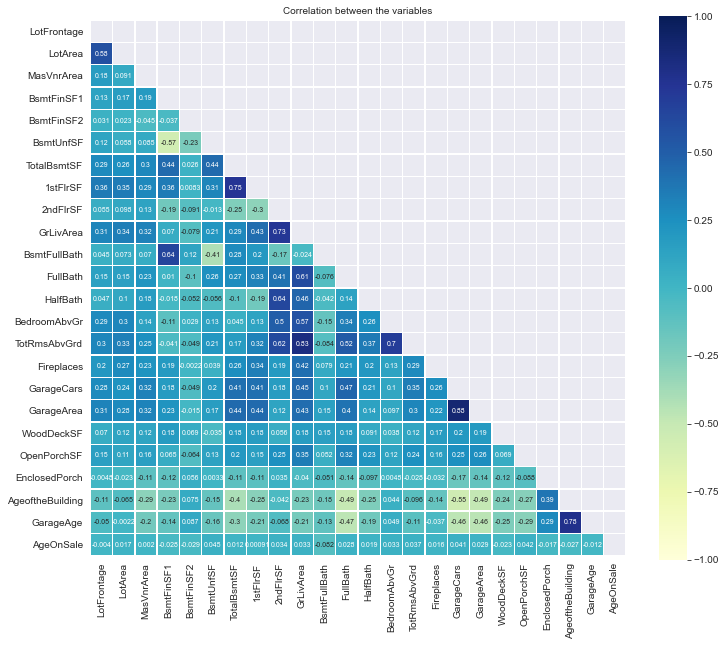

In [134]:
# Masked-Heatmap:
corr = df.corr()
mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask)]= True
f, ax = plt.subplots(figsize=(12,10))
with sns.axes_style('white'):
    ax= sns.heatmap(corr, mask=mask,square=True,cmap='YlGnBu',annot=True, 
                    annot_kws={'size':7},linewidths=0.4,vmax=1.0,vmin=-1.0)
    plt.title('Correlation between the variables',fontdict={'fontsize':10})
    plt.show()

From the above heatmap we can see that,
The target variable, SalePrice is highly correlated with OverallQual, GrLivArea and GarageCars.
GrLivArea is highly correlated with TotRmsAbvGrd at 82%.
GarageCars and GarageArea are highly correlated at 89%.

In [135]:
# finding the top 10 highly correlated feature:
n = 10
cols = Housedata.corr().nlargest(n, 'LogSalePrice')['LogSalePrice'].index
cols

Index(['LogSalePrice', 'OverallQual', 'GrLivArea', 'GarageCars', 'GarageArea',
       'TotalBsmtSF', 'FullBath', '1stFlrSF', 'TotRmsAbvGrd', 'Fireplaces'],
      dtype='object')

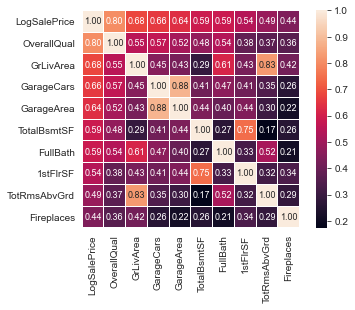

In [136]:
# plotting heatmap to show the correlation between top10 highly correlated variables:
cm = np.corrcoef(Housedata[cols].values.T)
hm = sns.heatmap(cm, cbar=True, annot=True, square=True, fmt='.2f', annot_kws={'size':9},
                 yticklabels=cols.values, xticklabels=cols.values,linewidths=0.1);

Top 10 highly correlated features are :

1.SalesPrice/LogSalesPrice

2.OverallQual

3.GrlivArea

4.GarageCars

5.GarageArea

6.TotalBsmtSF

7.FullBath

8.1stFlrSF

9.TotRmsAbvGrd

10.Fireplaces

In [137]:
# creating multiple custom functions to map the variables :
def fence_mapper(x):
    return x.map({'GdPrv': 4, "MnPrv": 3, "GdWo": 2, "MnWw": 1, "No Fence": 0})
def rating_mapper(x):
    return x.map({'Ex': 5 ,'Gd': 4,'TA': 3,'Fa': 2,'Po': 1 ,'No Garage':0,'others':0 })
def rating_mapper1(x):
    return x.map({'Gd': 4, "Av": 3, "Mn": 2, "No": 1, 'No Basement': 0})
def rating_mapper2(x):
    return x.map({'GLQ': 6, "ALQ": 5, "BLQ": 4, "Rec": 3, "LwQ": 2, 'Unf': 1, 'No Basement': 0})
def rating_mapper3(x):
    return x.map({'Ex': 5, "Gd": 4, "TA": 3, "Fa": 2, "Po": 1, 'No Basement':0 ,'No Fireplace':0 , 'No Garage' : 0, 'others':0 })
def hs_mapper(x):
    return x.map({'Fin': 3, "RFn": 2, "Unf": 1, "No Garage": 0})
def ls_mapper(x):
    return x.map({'Reg': 3, "IR1": 2, "IR2": 1, "IR3": 0})
# Applying the function to the columns
Housedata[['LotShape']] = Housedata[['LotShape']].apply(ls_mapper)
Housedata[['Fence']] = Housedata[['Fence']].apply(fence_mapper)
Housedata[['ExterQual','ExterCond','KitchenQual','HeatingQC','GarageQual']] = Housedata[['ExterQual','ExterCond','KitchenQual','HeatingQC','GarageQual']].apply(rating_mapper)
Housedata[['BsmtExposure']] = Housedata[['BsmtExposure']].apply(rating_mapper1)
Housedata[['BsmtFinType1']] = Housedata[['BsmtFinType1']].apply(rating_mapper2)
Housedata[['GarageFinish']] = Housedata[['GarageFinish']].apply(hs_mapper)
Housedata['BsmtFinType2'] = Housedata['BsmtFinType2'].map({'Unf':2 , 'Rec': 1, 'others': 0 })
Housedata['SaleCondition'] = Housedata['SaleCondition'].map({'Normal': 3, 'Partial': 2, 'Abnorml': 1,'others':0})
Housedata['HouseStyle'] = Housedata['HouseStyle'].map({'1Story': 3 ,'2Story': 2 ,'1.5Fin': 1 ,'others': 0 })
Housedata['MasVnrType'] = Housedata['MasVnrType'].map({'None': 2 , 'BrkFace': 1, 'others': 0 })
Housedata['LotConfig'] = Housedata['LotConfig'].map({'Inside': 2 , 'Corner': 1,'others': 0 })
Housedata['BldgType'] = Housedata['BldgType'].map({'1Fam': 2 ,'TwnhsE': 1,'others': 0 })
Housedata[['FireplaceQu','BsmtQual','BsmtCond']] = Housedata[['FireplaceQu','BsmtQual','BsmtCond']].apply(rating_mapper3)

## Dummy Variable Creation:

In [138]:
# changing the datatype of MSSubClass into categorical from int64:
Housedata["MSSubClass"]=Housedata["MSSubClass"].astype("object")

In [139]:
# Seperating the Categorical columns from the data
Housedata_cat = Housedata.select_dtypes(include=['object'])
Housedata_cat.columns

Index(['MSSubClass', 'MSZoning', 'LandContour', 'Neighborhood', 'Condition1',
       'RoofStyle', 'Exterior1st', 'Exterior2nd', 'Foundation', 'GarageType',
       'SaleType'],
      dtype='object')

In [140]:
# Creating dummies of the remaining categorical columns:
Housedata_dummies = pd.get_dummies(Housedata_cat, drop_first=True)
print(Housedata_dummies.shape) # shape of the updated dataframe
Housedata_dummies.head()

(1260, 91)


,MSSubClass_30,MSSubClass_40,MSSubClass_45,MSSubClass_50,MSSubClass_60,MSSubClass_70,MSSubClass_75,MSSubClass_80,MSSubClass_85,MSSubClass_90,MSSubClass_120,MSSubClass_160,MSSubClass_180,MSSubClass_190,MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,LandContour_others,Neighborhood_Blueste,Neighborhood_BrDale,Neighborhood_BrkSide,Neighborhood_ClearCr,Neighborhood_CollgCr,Neighborhood_Crawfor,Neighborhood_Edwards,Neighborhood_Gilbert,Neighborhood_IDOTRR,Neighborhood_MeadowV,Neighborhood_Mitchel,Neighborhood_NAmes,Neighborhood_NPkVill,Neighborhood_NWAmes,Neighborhood_NoRidge,Neighborhood_NridgHt,Neighborhood_OldTown,Neighborhood_SWISU,Neighborhood_Sawyer,Neighborhood_SawyerW,Neighborhood_Somerst,Neighborhood_StoneBr,Neighborhood_Timber,Neighborhood_Veenker,Condition1_Norm,Condition1_others,RoofStyle_Gable,RoofStyle_Gambrel,RoofStyle_Hip,RoofStyle_Mansard,RoofStyle_Shed,Exterior1st_AsphShn,Exterior1st_BrkComm,Exterior1st_BrkFace,Exterior1st_CBlock,Exterior1st_CemntBd,Exterior1st_HdBoard,Exterior1st_MetalSd,Exterior1st_Plywood,Exterior1st_Stucco,Exterior1st_VinylSd,Exterior1st_Wd Sdng,Exterior1st_WdShing,Exterior2nd_AsphShn,Exterior2nd_Brk Cmn,Exterior2nd_BrkFace,Exterior2nd_CBlock,Exterior2nd_CmentBd,Exterior2nd_HdBoard,Exterior2nd_ImStucc,Exterior2nd_MetalSd,Exterior2nd_Other,Exterior2nd_Plywood,Exterior2nd_Stone,Exterior2nd_Stucco,Exterior2nd_VinylSd,Exterior2nd_Wd Sdng,Exterior2nd_Wd Shng,Foundation_CBlock,Foundation_PConc,Foundation_Slab,Foundation_Stone,Foundation_Wood,GarageType_Attchd,GarageType_Basment,GarageType_BuiltIn,GarageType_CarPort,GarageType_Detchd,GarageType_No Garage,SaleType_New,SaleType_WD,SaleType_others
0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0
2,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0
4,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0
5,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,1,0,0,0,0,0,0,1,0


In [141]:
#Dropping the columns for which we have dummy values.
Housedata = Housedata.drop(list(Housedata_cat.columns), axis=1)

In [142]:
Housedata= pd.concat([Housedata, Housedata_dummies], axis=1)
print(Housedata.shape)

(1260, 138)


In [143]:
# changing the datatype for excluding it from scaling:
Housedata["OverallQual"]=Housedata["OverallQual"].astype("uint8")
Housedata["OverallCond"]=Housedata["OverallCond"].astype("uint8")

## Train-Test Split:

In [144]:
# Splitting the target and predictors from the dataset:
y = Housedata['LogSalePrice']
X = Housedata.drop(['LogSalePrice'], axis=1)
print(f'Shape of X: {X.shape} \t Shape of y: {y.shape}')

Shape of X: (1260, 137) 	 Shape of y: (1260,)


In [145]:
# Performing train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, random_state=100)
print(f'Shape of X_train: {X_train.shape} \t Shape of y_train: {y_train.shape}')
print(f'Shape of X_test: {X_test.shape} \t Shape of y_test: {y_test.shape}')

Shape of X_train: (882, 137) 	 Shape of y_train: (882,)
Shape of X_test: (378, 137) 	 Shape of y_test: (378,)


## Feature Scaling:

In [146]:
# Initialising the standard scaler
scaler = StandardScaler()

# Subsetting the columns which needs to be scaled
cols = list(X_train.select_dtypes(exclude=['uint8']).columns)

# Scaling the columns in train and test dataset using fit_transform and transform respectively
X_train[cols] = scaler.fit_transform(X_train[cols])
X_test[cols] = scaler.transform(X_test[cols])

## Model Building:

Feature Selection Using RFE

In [147]:
lr = LinearRegression()
rfe = RFE(lr,50)    
rfe = rfe.fit(X_train, y_train)

In [148]:
# Finding the result of RFE
rfe.support_

array([False,  True, False, False, False, False,  True,  True, False,
       False, False, False, False, False, False, False,  True, False,
        True, False,  True, False, False, False,  True, False, False,
       False, False, False, False, False, False, False,  True, False,
       False, False, False, False, False, False,  True, False, False,
       False,  True, False, False, False, False,  True, False, False,
       False, False, False,  True,  True, False,  True,  True,  True,
        True,  True,  True, False,  True, False, False,  True,  True,
       False, False,  True,  True,  True, False,  True, False,  True,
       False, False,  True,  True,  True,  True, False, False,  True,
       False,  True,  True,  True, False,  True, False,  True, False,
       False, False, False, False, False, False,  True,  True, False,
        True,  True, False, False, False, False, False, False, False,
       False, False, False,  True,  True, False, False,  True, False,
       False, False,

In [149]:
# Comparing the RFE results with the column names
list(zip(X_train.columns, rfe.support_, rfe.ranking_))

[('LotFrontage', False, 60),
 ('LotArea', True, 1),
 ('LotShape', False, 66),
 ('LotConfig', False, 84),
 ('BldgType', False, 28),
 ('HouseStyle', False, 78),
 ('OverallQual', True, 1),
 ('OverallCond', True, 1),
 ('MasVnrType', False, 79),
 ('MasVnrArea', False, 68),
 ('ExterQual', False, 63),
 ('ExterCond', False, 70),
 ('BsmtQual', False, 86),
 ('BsmtCond', False, 47),
 ('BsmtExposure', False, 42),
 ('BsmtFinType1', False, 56),
 ('BsmtFinSF1', True, 1),
 ('BsmtFinType2', False, 76),
 ('BsmtFinSF2', True, 1),
 ('BsmtUnfSF', False, 2),
 ('TotalBsmtSF', True, 1),
 ('HeatingQC', False, 39),
 ('1stFlrSF', False, 45),
 ('2ndFlrSF', False, 71),
 ('GrLivArea', True, 1),
 ('BsmtFullBath', False, 29),
 ('FullBath', False, 40),
 ('HalfBath', False, 44),
 ('BedroomAbvGr', False, 72),
 ('KitchenQual', False, 54),
 ('TotRmsAbvGrd', False, 85),
 ('Fireplaces', False, 64),
 ('FireplaceQu', False, 33),
 ('GarageFinish', False, 51),
 ('GarageCars', True, 1),
 ('GarageArea', False, 34),
 ('GarageQual'

In [150]:
# Finding the columns which are selected by RFE
rfe_cols = X_train.columns[rfe.support_]
rfe_cols

Index(['LotArea', 'OverallQual', 'OverallCond', 'BsmtFinSF1', 'BsmtFinSF2',
       'TotalBsmtSF', 'GrLivArea', 'GarageCars', 'AgeoftheBuilding',
       'MSSubClass_30', 'MSSubClass_70', 'MSSubClass_160', 'MSSubClass_180',
       'MSZoning_FV', 'MSZoning_RH', 'MSZoning_RL', 'MSZoning_RM',
       'LandContour_others', 'Neighborhood_Blueste', 'Neighborhood_BrkSide',
       'Neighborhood_Crawfor', 'Neighborhood_Edwards', 'Neighborhood_MeadowV',
       'Neighborhood_Mitchel', 'Neighborhood_NAmes', 'Neighborhood_NWAmes',
       'Neighborhood_NridgHt', 'Neighborhood_Sawyer', 'Neighborhood_SawyerW',
       'Neighborhood_Somerst', 'Neighborhood_StoneBr', 'Condition1_Norm',
       'RoofStyle_Gable', 'RoofStyle_Gambrel', 'RoofStyle_Hip',
       'RoofStyle_Shed', 'Exterior1st_BrkComm', 'Exterior1st_VinylSd',
       'Exterior1st_Wd Sdng', 'Exterior2nd_AsphShn', 'Exterior2nd_Brk Cmn',
       'Exterior2nd_VinylSd', 'Exterior2nd_Wd Sdng', 'Foundation_PConc',
       'GarageType_Attchd', 'GarageType_Bui

In [151]:
# Custom function for VIF:
def vif(X_train):
    vif = pd.DataFrame()
    vif['Features'] = X_train.columns
    vif['VIF'] = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]
    vif['VIF'] = round(vif['VIF'], 2)
    vif = vif.sort_values(by = "VIF", ascending = False)
    print(vif)

In [152]:
# linear-model-1 using RFE:
# Creating a first linear model between the X_train with rfe selected variables and Y_train:
X_train_1 = X_train[rfe_cols]
X_train_lm = sm.add_constant(X_train_1)
# Adding a constant variable 
lm = sm.OLS(y_train, X_train_lm).fit()  # Running the linear model
print(lm.summary())                     # Returning the summary of our linear model
print('='*120)
print()
vif(X_train_1)

                            OLS Regression Results                            
Dep. Variable:           LogSalePrice   R-squared:                       0.914
Model:                            OLS   Adj. R-squared:                  0.909
Method:                 Least Squares   F-statistic:                     176.3
Date:                Thu, 05 Aug 2021   Prob (F-statistic):               0.00
Time:                        22:44:11   Log-Likelihood:                 739.13
No. Observations:                 882   AIC:                            -1376.
Df Residuals:                     831   BIC:                            -1132.
Df Model:                          50                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                   10.8942 

Our first Linear Model using RFE has R2 of 91.8 and adjusted R2 of 91.3 which is pretty good.

Now we have used RFE and RFE has given us the 50 important feature.

We will apply regularization technique on this columns using Ridge and lasso with different values of Alpha(hyperparameter).

Also, we will choose best alpha and compare both the techniques model performance.



## Ridge Regression:

In [153]:
# Instantiating the Ridge regressor
ridge = Ridge()

# List of alphas to tune
params = {'alpha': [0.0001, 0.001, 0.01,0.05,0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 
                    2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0,9.0, 10.0, 20, 50, 100, 500, 1000 ]}
X_train = X_train_1
# Performing Grid Search
folds  = KFold(n_splits=5,shuffle=True,random_state=42)
ridge_model_cv = GridSearchCV(estimator = ridge, 
                              param_grid = params, 
                              scoring= 'neg_mean_absolute_error', 
                              cv = folds, 
                              return_train_score=True,
                              verbose = 1)            
# fitting the model:
ridge_model_cv.fit(X_train, y_train)

Fitting 5 folds for each of 28 candidates, totalling 140 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 140 out of 140 | elapsed:    0.8s finished


GridSearchCV(cv=KFold(n_splits=5, random_state=42, shuffle=True),
             estimator=Ridge(),
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3,
                                   0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0,
                                   4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50,
                                   100, 500, 1000]},
             return_train_score=True, scoring='neg_mean_absolute_error',
             verbose=1)

In [155]:
# storing the result in dataframe :
ridge_cv_results = pd.DataFrame(ridge_model_cv.cv_results_)
# filtering to show the result till alpha 500 on plot:
ridge_cv_results = ridge_cv_results[ridge_cv_results['param_alpha']<= 500]
ridge_cv_results.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_alpha,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.019347,0.033213,0.001795,0.000399,0.000100,{'alpha': 0.0001},-0.083700,-0.078023,-0.076353,-0.094169,-0.076674,-0.081784,0.006735,24,-0.073467,-0.074433,-0.075738,-0.069997,-0.075414,-0.073810,0.002065
1,0.002194,0.000399,0.001197,0.000399,0.001000,{'alpha': 0.001},-0.083694,-0.078023,-0.076349,-0.094157,-0.076675,-0.081779,0.006731,23,-0.073468,-0.074433,-0.075738,-0.070000,-0.075413,-0.073810,0.002064
2,0.002394,0.000489,0.001596,0.000488,0.010000,{'alpha': 0.01},-0.083630,-0.078025,-0.076305,-0.094035,-0.076688,-0.081737,0.006687,22,-0.073469,-0.074436,-0.075734,-0.070022,-0.075410,-0.073814,0.002055
3,0.002593,0.000798,0.001795,0.000398,0.050000,{'alpha': 0.05},-0.083362,-0.078035,-0.076119,-0.093528,-0.076743,-0.081558,0.006507,21,-0.073476,-0.074447,-0.075718,-0.070110,-0.075395,-0.073829,0.002018
4,0.002593,0.000798,0.001795,0.000399,0.100000,{'alpha': 0.1},-0.083061,-0.078050,-0.075902,-0.092964,-0.076805,-0.081356,0.006309,20,-0.073487,-0.074457,-0.075703,-0.070212,-0.075377,-0.073847,0.001975


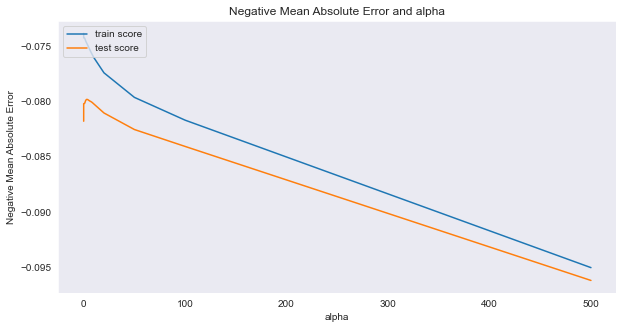

In [156]:
ridge_cv_results['param_alpha'] = ridge_cv_results['param_alpha'].astype('int32')
# Plotting the results of Grid Search
plt.figure(figsize=(10,5))
plt.plot(ridge_cv_results['param_alpha'], ridge_cv_results['mean_train_score'])
plt.plot(ridge_cv_results['param_alpha'], ridge_cv_results['mean_test_score'])
plt.xlabel('alpha')
plt.ylabel('Negative Mean Absolute Error')
plt.title("Negative Mean Absolute Error and alpha")
plt.legend(['train score', 'test score'], loc='upper left')
plt.show()

In [157]:
# Finding the optimal value of alpha
ridge_model_cv.best_estimator_

Ridge(alpha=3.0)

In [158]:
# Building the model using optimal value of alpha:
alpha = 3.0
ridge = Ridge(alpha=alpha)
ridge.fit(X_train, y_train)
ridge.coef_

array([ 0.02521484,  0.06161541,  0.05298613,  0.04460448,  0.00811309,
        0.04103325,  0.12211723,  0.03622918, -0.08225251, -0.02276571,
        0.04107764, -0.09929174,  0.02299128,  0.09812456,  0.07062739,
        0.13775021,  0.0669506 , -0.02383016,  0.03272983,  0.05144545,
        0.1061763 , -0.03396558, -0.05783629, -0.05602304, -0.0212236 ,
       -0.04682878,  0.06933024, -0.02193505, -0.0204836 ,  0.09713536,
        0.07603706,  0.06491385, -0.00747793, -0.06316572, -0.00411212,
       -0.01890921, -0.00256987, -0.03686869, -0.06583739,  0.0263522 ,
        0.02902491,  0.03102233,  0.05841217,  0.04909735,  0.0457012 ,
        0.04572966,  0.03138444,  0.0677727 ,  0.04175756,  0.03728369])

In [159]:
## Calculating train R2 score for Ridge:
y_train_pred=ridge.predict(X_train)
X_test =X_test[rfe_cols]
y_test_pred=ridge.predict(X_test)
print("R-Squared value on Train set: ",round(r2_score(y_train,y_train_pred),4))
## Calculating test R2 score and MSE on test for Ridge:
print(f'Mean squared error on test dataset: {round(metrics.mean_squared_error(y_test, y_test_pred),4)}')

print(f'R-squared value on test dataset: {round(metrics.r2_score(y_test,y_test_pred),4)}')

R-Squared value on Train set:  0.9109
Mean squared error on test dataset: 0.0125
R-squared value on test dataset: 0.9045


In [160]:
# Finding the top 10 significant variables according to ridge regressor

ridge_df = pd.DataFrame({'Features':X_train.columns, 'Coefficient':ridge.coef_.round(4)})
ridge_df = ridge_df.sort_values(by='Coefficient', ascending=False).reset_index(drop=True)

ridge_df.head(10)

,Features,Coefficient
0,MSZoning_RL,0.137800
1,GrLivArea,0.122100
2,Neighborhood_Crawfor,0.106200
3,MSZoning_FV,0.098100
4,Neighborhood_Somerst,0.097100
5,Neighborhood_StoneBr,0.076000
6,MSZoning_RH,0.070600
7,Neighborhood_NridgHt,0.069300
8,SaleType_New,0.067800
9,MSZoning_RM,0.067000


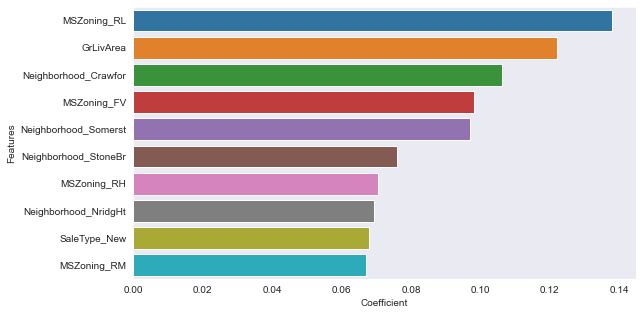

In [161]:
# Plotting the top 10 variables along with their coefficients
plt.figure(figsize=(9,5))
sns.barplot(y = 'Features', x='Coefficient', data = ridge_df.head(10));

#### Ridge Regression after doubling the alpha value

In [162]:
ridge = Ridge(alpha=6.0)
ridge.fit(X_train, y_train)

y_train_pred=ridge.predict(X_train)

y_test_pred=ridge.predict(X_test)

print("R2 on Train set:",round(metrics.r2_score(y_true=y_train, y_pred=y_train_pred),4))
print(f'Mean squared error on test dataset: {round(metrics.mean_squared_error(y_test, y_test_pred),4)}')
print(f'R-squared value on test dataset: {round(metrics.r2_score(y_test, y_test_pred),4)}')

ridge_df_2 = pd.DataFrame({'Features':X_train.columns, 'Coefficient':ridge.coef_.round(4)})
ridge_df_2 = ridge_df_2.sort_values(by='Coefficient', ascending=False).reset_index(drop=True)

ridge_df_2.head(10)

R2 on Train set: 0.9091
Mean squared error on test dataset: 0.0125
R-squared value on test dataset: 0.9045


,Features,Coefficient
0,GrLivArea,0.121100
1,MSZoning_RL,0.099200
2,Neighborhood_Crawfor,0.096400
3,Neighborhood_Somerst,0.083800
4,MSZoning_FV,0.066600
5,OverallQual,0.064000
6,Condition1_Norm,0.062900
7,Neighborhood_NridgHt,0.060700
8,Neighborhood_StoneBr,0.059800
9,SaleType_New,0.056700


## Lasso Regression

In [163]:
# Instantiating the Lasso regressor
folds  = KFold(n_splits=5,shuffle=True,random_state=42)

lasso = Lasso()

# List of alphas to tune
params = {'alpha': [0.0002,0.0003,0.0004,0.0005, 0.001, 0.01,0.05,0.1, 0.2, 0.3, 0.4, 0.5]}
# Preforming Grid Search
X_train =X_train_1

lasso_model_cv = GridSearchCV(estimator = lasso,
                              param_grid = params, 
                              scoring= 'neg_mean_absolute_error', 
                              cv = folds, 
                              return_train_score=True, 
                              verbose = 1)            

lasso_model_cv.fit(X_train, y_train)

Fitting 5 folds for each of 12 candidates, totalling 60 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  60 out of  60 | elapsed:    0.4s finished


GridSearchCV(cv=KFold(n_splits=5, random_state=42, shuffle=True),
             estimator=Lasso(),
             param_grid={'alpha': [0.0002, 0.0003, 0.0004, 0.0005, 0.001, 0.01,
                                   0.05, 0.1, 0.2, 0.3, 0.4, 0.5]},
             return_train_score=True, scoring='neg_mean_absolute_error',
             verbose=1)

In [164]:
lasso_cv_results = pd.DataFrame(lasso_model_cv.cv_results_)
lasso_cv_results.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_alpha,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.009375,0.005627,0.002194,0.000398,0.000200,{'alpha': 0.0002},-0.080499,-0.078695,-0.073539,-0.090077,-0.078354,-0.080233,0.005435,1,-0.074344,-0.074682,-0.076405,-0.071918,-0.075587,-0.074587,0.001516
1,0.006183,0.001716,0.002597,0.001359,0.000300,{'alpha': 0.0003},-0.080487,-0.078766,-0.073006,-0.090848,-0.078794,-0.080380,0.005815,2,-0.074935,-0.074907,-0.077073,-0.072819,-0.075968,-0.075140,0.001408
2,0.004188,0.000746,0.001396,0.000488,0.000400,{'alpha': 0.0004},-0.080503,-0.079037,-0.072725,-0.091328,-0.079200,-0.080559,0.006025,3,-0.075530,-0.075322,-0.077651,-0.073443,-0.076423,-0.075674,0.001385
3,0.003591,0.000488,0.001197,0.000399,0.000500,{'alpha': 0.0005},-0.080550,-0.079264,-0.072665,-0.091454,-0.079548,-0.080696,0.006060,4,-0.076063,-0.075685,-0.078261,-0.073888,-0.076964,-0.076172,0.001446
4,0.003192,0.000978,0.002193,0.000398,0.001000,{'alpha': 0.001},-0.081216,-0.080994,-0.073507,-0.091243,-0.080019,-0.081396,0.005680,5,-0.077907,-0.077724,-0.080438,-0.075638,-0.078575,-0.078056,0.001544


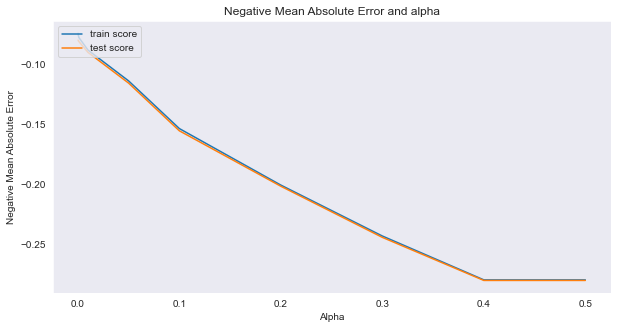

In [165]:
# plotting mean test and train scoes with alpha 
lasso_cv_results['param_alpha'] = lasso_cv_results['param_alpha'].astype('float32')

# plotting
plt.figure(figsize=(10,5))

plt.plot(lasso_cv_results['param_alpha'], lasso_cv_results['mean_train_score'])
plt.plot(lasso_cv_results['param_alpha'], lasso_cv_results['mean_test_score'])
plt.xlabel('Alpha')
plt.ylabel('Negative Mean Absolute Error')

plt.title("Negative Mean Absolute Error and alpha")
plt.legend(['train score', 'test score'], loc='upper left')
plt.show()

In [166]:
lasso_model_cv.best_estimator_

Lasso(alpha=0.0002)

In [167]:
# Building the model using optimal alpha value

alpha = 0.0002
lasso = Lasso(alpha=alpha)
        
lasso.fit(X_train, y_train) 
lasso.coef_

array([ 0.02404714,  0.0616308 ,  0.05252207,  0.04417385,  0.00813493,
        0.04042065,  0.12278566,  0.03754123, -0.08165006, -0.02227268,
        0.0368792 , -0.10575392,  0.        ,  0.17735951,  0.14117103,
        0.21303492,  0.14316838, -0.02122881,  0.        ,  0.04947173,
        0.11295876, -0.03165684, -0.04724372, -0.05384072, -0.01841556,
       -0.04346836,  0.07095187, -0.01751573, -0.01574319,  0.0991192 ,
        0.08200283,  0.06490299, -0.00336668, -0.04497063,  0.        ,
       -0.        ,  0.        , -0.02034441, -0.06464318,  0.        ,
        0.00162074,  0.01514336,  0.05623902,  0.04830187,  0.03761021,
        0.03615363,  0.02411056,  0.0581084 ,  0.03218373,  0.02641387])

We can see that Lasso model has reduced the coeff. to 0 for 6 features,now in our final model we will have only 44 features instead of 50 (given as an input).

It has make the model less complex by performing its feature reduction skill.

Let's check the R_Squared Value on the train and test sets in the next steps.

In [168]:
y_pred_train=lasso.predict(X_train)
y_test_pred=lasso.predict(X_test)
print('R2 score on Train set: ',round(r2_score(y_train,y_pred_train),4)*100)
print('R2 score on Test set: ',round(r2_score(y_test,y_test_pred),5)*100)

R2 score on Train set:  91.16
R2 score on Test set:  90.646


In [169]:
print(f'Mean squared error on test dataset: {round(metrics.mean_squared_error(y_test, lasso.predict(X_test)),4)}')
print(f'R-squared value on test dataset: {round(metrics.r2_score(y_test, lasso.predict(X_test)),4)}')

Mean squared error on test dataset: 0.0123
R-squared value on test dataset: 0.9065


In [170]:
# Finding the top 10 significant variables according to lasso regressor

lasso_df = pd.DataFrame({'Features':X_train.columns, 'Coefficient':lasso.coef_.round(4)})
lasso_df = lasso_df[lasso_df['Coefficient'] != 0.00]
lasso_df = lasso_df.sort_values(by='Coefficient', ascending=False).reset_index(drop=True)
lasso_df.head(10)

,Features,Coefficient
0,MSZoning_RL,0.213000
1,MSZoning_FV,0.177400
2,MSZoning_RM,0.143200
3,MSZoning_RH,0.141200
4,GrLivArea,0.122800
5,Neighborhood_Crawfor,0.113000
6,Neighborhood_Somerst,0.099100
7,Neighborhood_StoneBr,0.082000
8,Neighborhood_NridgHt,0.071000
9,Condition1_Norm,0.064900


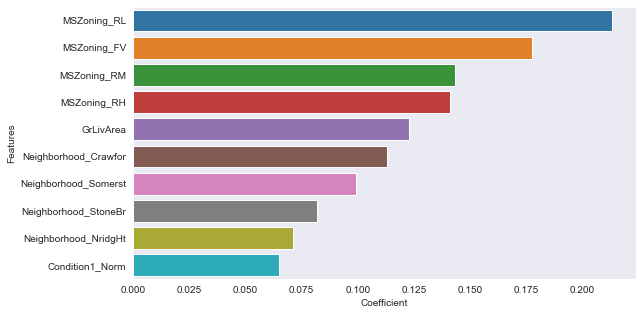

In [171]:
# Plotting top 10 significant variables along with their coefficients
plt.figure(figsize=(9,5))
sns.barplot(y = 'Features', x='Coefficient', data = lasso_df.head(10))
plt.show()

#### Lasso Regression after doubling the alpha value:

In [172]:
# Doubling:
lasso = Lasso(alpha=0.0004)
lasso.fit(X_train, y_train)
y_pred_train=lasso.predict(X_train)
y_test_pred=lasso.predict(X_test)
print("R2 score on train set: ",round(r2_score(y_train,y_pred_train),4)*100)
#print("R2 score on train set: ",round(r2_score(y_train,y_pred_train),2)*100)
print(f'Mean squared error on test dataset: {round(metrics.mean_squared_error(y_test, y_test_pred),4)}')
print(f'R-squared value on test dataset: {round(metrics.r2_score(y_test, y_test_pred),4)}')

lasso_df_2 = pd.DataFrame({'Features':X_train.columns, 'Coefficient':lasso.coef_.round(4)})
lasso_df = lasso_df[lasso_df['Coefficient'] != 0.00]
lasso_df_2 = lasso_df_2.sort_values(by='Coefficient', ascending=False).reset_index(drop=True)

lasso_df_2.head(10)

R2 score on train set:  90.75
Mean squared error on test dataset: 0.0125
R-squared value on test dataset: 0.9051


,Features,Coefficient
0,GrLivArea,0.123300
1,Neighborhood_Crawfor,0.113300
2,Neighborhood_Somerst,0.098900
3,MSZoning_RL,0.090000
4,OverallQual,0.065600
5,Condition1_Norm,0.063300
6,Neighborhood_StoneBr,0.063100
7,Neighborhood_NridgHt,0.063000
8,OverallCond,0.053300
9,Neighborhood_BrkSide,0.050100


Conclusion
The optimal value of lambda, mean squared error and R squared value of Ridge and Lasso Regression are as follows:

Ridge Regression :

Optimal alpha value : 3.0

Mean squared error : 0.0125

R-squared value on train set : 0.9109 or 91.09 %

R-squared value on test set : 0.9045 or 90.45 %

Lasso Regression :

Optimal alpha value : 0.0002

Mean squared error : 0.0123

R-squared value on train set : 0.9116 or 91.16 %

R-squared value on test set : 0.9065 or 90.65 %